<h3> Number 1 </h3>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

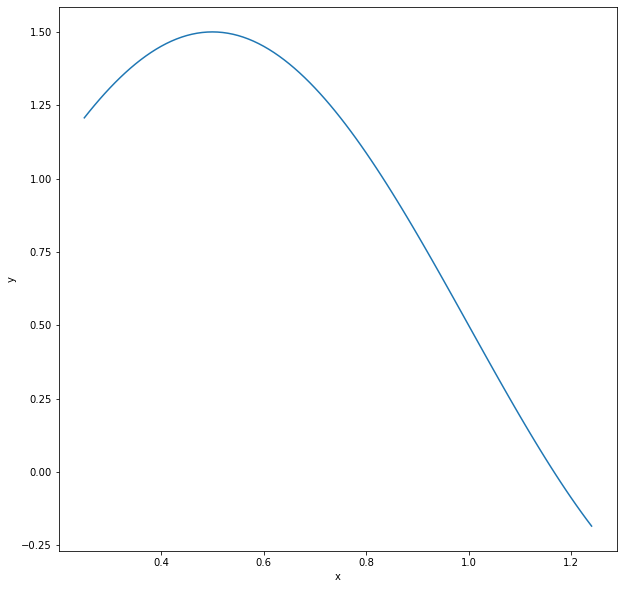

In [6]:
x = np.arange(0.25,1.25,0.01)
y = 0.5 + np.sin(np.pi*x)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

<h3> Number 2 </h3>

In [9]:
from scipy import integrate

In [27]:
ans = integrate.simps(y,x,even='avg')
print('The answer is', ans)

The answer is 0.9521169837863093


<h3> Number 3 </h3>

In [57]:
a = 0.25; b = 1.25
N = 100000
ar = np.zeros(N)
integral = 0
for i in range(len(ar)):
        ar[i] = np.random.uniform(a,b)
def f(x):
    y =0.5 + np.sin(np.pi*x)
    return y
for i in ar:
    integral += f(i)
ans = (b-a)/float(N)*integral
print('The answer is', ans)
print('As the value of N increases, the value of the area slowly approach the result in number 2')

The answer is 0.9506676562351938
As the value of N increases, the value of the area slowly approach the result in number 2
